In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize
#sns.set(context="talk")
plt.xkcd();

### Visualizing the dataset

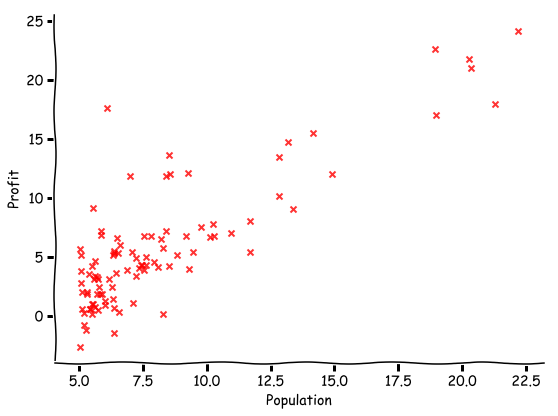

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [2]:
df = pd.read_csv("ex1data1.txt", names=["Population", "Profit"])

sns.lmplot(x="Population", y="Profit", data=df,
           fit_reg=False, # No regression line
           scatter_kws={'color': 'red'}, 
           markers='x', 
           size=6, # Height in inch
           aspect=1.33)  # Ratio of width to height
plt.show()

df.describe()

### Define hypothesis and cost function

In [3]:
# Linear regression function
def hypo(theta, X):
    h = X.dot(theta)
    return h.reshape((-1, 1))

# Cost and gradient function
def cost(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    cost = 1/(2*m) * np.sum((h-y)**2)
    grad = 1/m * (h - y).T.dot(X)
    return cost, grad.ravel()

X = df.values[:, 0:len(df.columns)-1]
y = df.values[:, len(df.columns)-1:len(df.columns)]
X = np.concatenate((np.ones([len(y), 1]), X), axis=1)

### Gradient descent for minimize cost function

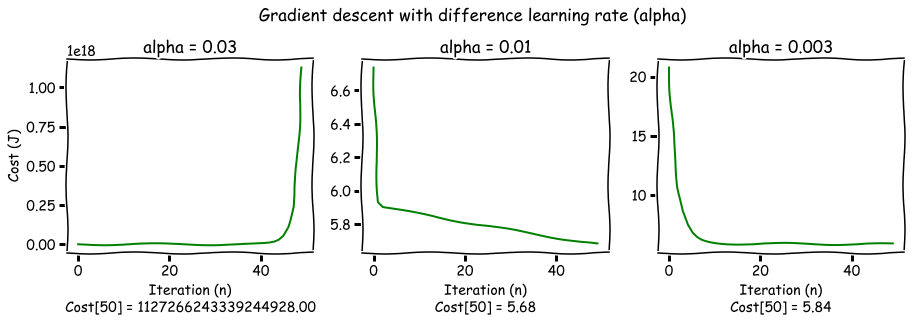

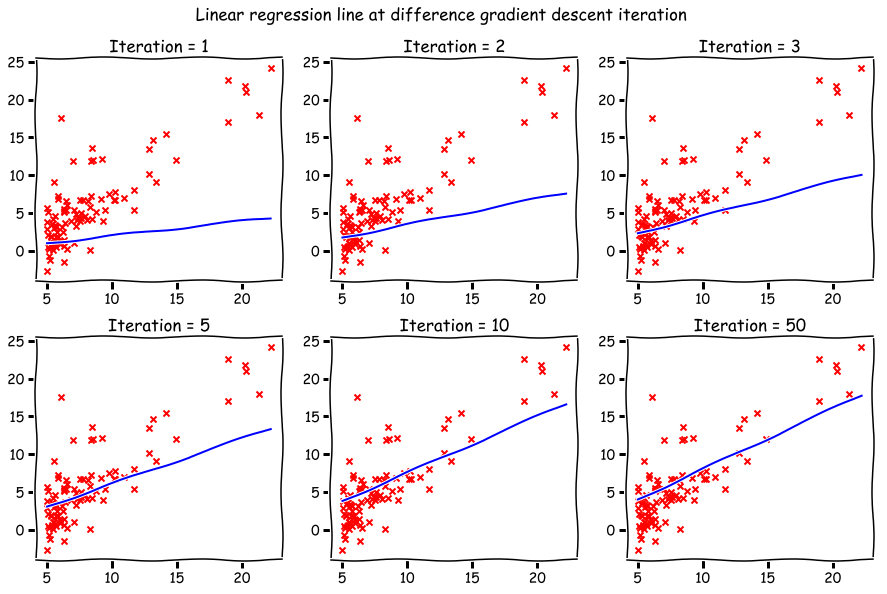

In [4]:
num_iter = 50
alpha = [0.03, 0.01, 0.003]
plt.figure(figsize=(15, 4))
for i in range(len(alpha)):
    theta = np.zeros([len(df.columns)])
    cost_hist = np.zeros((num_iter, 1))
    theta_hist = np.zeros((num_iter, len(theta)))
    for j in range(num_iter):
        theta = theta - alpha[i]*cost(theta, X, y)[1]
        cost_hist[j] = cost(theta, X, y)[0]
        theta_hist[j] = theta
    plt.subplot(1, 3, i+1)
    plt.plot(range(num_iter), cost_hist, "g-")
    plt.title("alpha = {}".format(alpha[i]))
    if i == 0: plt.ylabel("Cost (J)")
    plt.xlabel("Iteration (n)\nCost[{0}] = {1:.2f}".format(num_iter, cost_hist[-1][0]))
plt.suptitle("Gradient descent with difference learning rate (alpha)")
plt.subplots_adjust(top=0.8)
plt.show()

num_iter = [0, 1, 2, 4, 9, 49]
plt.figure(figsize=(15, 9))
for i in range(len(num_iter)):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, 1], y, c="r", marker="x")
    t = np.array([np.linspace(df.Population.min(), df.Population.max(), 100)]).T
    f = hypo(theta_hist[num_iter[i]], np.concatenate((np.ones([len(t), 1]), t), axis=1))
    plt.plot(t.flatten(), f.flatten(), "b-")    
    plt.title("Iteration = {0}".format(num_iter[i]+1))
plt.suptitle("Linear regression line at difference gradient descent iteration")
plt.subplots_adjust(top=0.9, hspace=0.25)
plt.show()

### Minimize cost function and find learned parameters theta

In [5]:
res = minimize(cost, theta, args=(X, y), jac=True)
print(res)

      fun: 4.476971375975179
 hess_inv: array([[ 5.49224818, -0.5505341 ],
       [-0.5505341 ,  0.06746907]])
      jac: array([ -8.10348352e-16,  -5.73431156e-15])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-3.89578088,  1.19303364])


### Plot linear fit with scatter plot of data

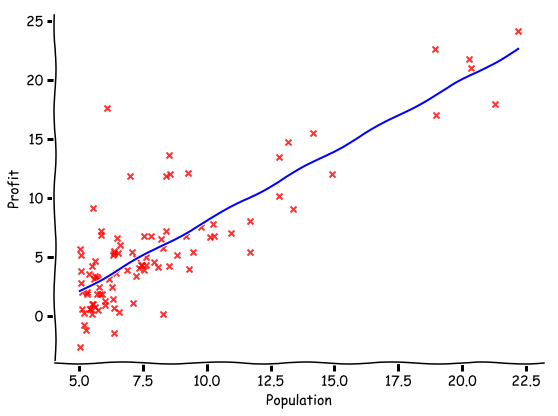

In [6]:
# Plot scatter
sns.lmplot(x="Population", y="Profit", data=df,
           fit_reg=False, # No regression line
           scatter_kws={"color": "red"}, 
           markers="x", 
           size=6, # Height in inch
           aspect=1.33)  # Ratio of width to height
# Plot regression line
t = np.array([np.linspace(df.Population.min(), df.Population.max(), 100)]).T
f = hypo(res.x, np.concatenate((np.ones([len(t), 1]), t), axis=1))
plt.plot(t.flatten(), f.flatten(), "b-")
plt.show()

### Predict values

In [7]:
# Predict values for population sizes of 35,000 and 70,000
x_predict = np.array([1, 3.5])
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For population = 35,000, we predict a profit of {0:.2f}".format(y_predict*10000))
x_predict = np.array([1, 7])
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For population = 70,000, we predict a profit of {0:.2f}".format(y_predict*10000))

For population = 35,000, we predict a profit of 2798.37
For population = 70,000, we predict a profit of 44554.55
